# Demonstration of Data Analysis#



In [ ]:
## As part of analysis, we will examine a dataset t

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Altair-Library-and-Iris-Data-Set" data-toc-modified-id="Import-Altair-Library-and-Iris-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Altair Library and Iris Data Set</a></span></li><li><span><a href="#First-Altair-Chart" data-toc-modified-id="First-Altair-Chart-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First Altair Chart</a></span></li><li><span><a href="#Basic-SPLOM-Chart" data-toc-modified-id="Basic-SPLOM-Chart-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic SPLOM Chart</a></span></li></ul></div>

### Constants for our analysis ###
* [City of Chicago Camera Data](https://data.cityofchicago.org/stories/s/uqi3-8a7k)

* [Raw Data CSV](https://data.cityofchicago.org/api/views/hhkd-xvj4/rows.csv?accessType=DOWNLOAD)

In [1]:
# TODO: Move to util area - hide the butchery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import matplotlib.dates as mdates
import matplotlib.ticker as ticker 

import ipywidgets as widgets
import seaborn as sns

# TODO: Move to util area - hide the butchery

from modules.reusable import * 

df = get_chicago_dataset(force=False)
df.head()


,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,CAMERA_ID,VIOLATION_DATE,VIOLATIONS_NUMERIC,YEAR,DAY_NAME,MONTH_NAME
0,1111 N HUMBOLDT,CHI010,04/10/2015,67,NaN,NaN,NaN,NaN,NaN,CHI010,2015-04-10,67,2015,Friday,April
1,1111 N HUMBOLDT,CHI010,04/25/2015,71,NaN,NaN,NaN,NaN,NaN,CHI010,2015-04-25,71,2015,Saturday,April
2,1111 N HUMBOLDT,CHI010,04/14/2015,38,NaN,NaN,NaN,NaN,NaN,CHI010,2015-04-14,38,2015,Tuesday,April
3,1111 N HUMBOLDT,CHI010,04/16/2015,55,NaN,NaN,NaN,NaN,NaN,CHI010,2015-04-16,55,2015,Thursday,April
4,1111 N HUMBOLDT,CHI010,04/24/2015,54,NaN,NaN,NaN,NaN,NaN,CHI010,2015-04-24,54,2015,Friday,April


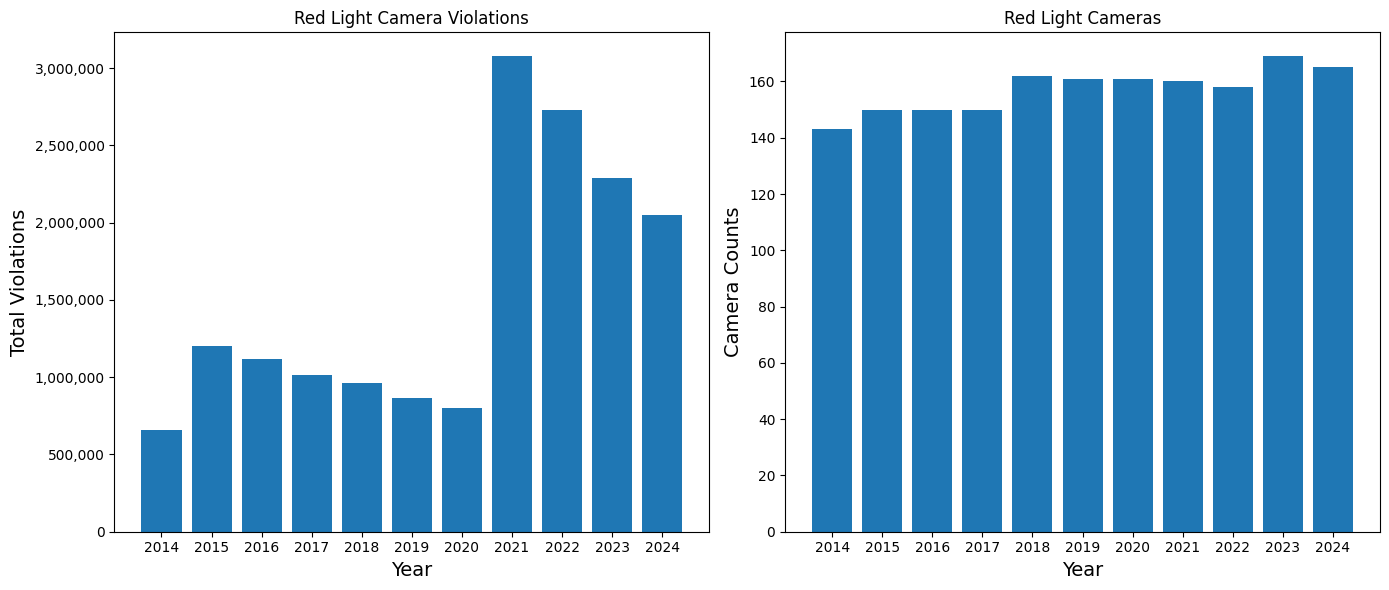

In [2]:
#from utils.data.data_visualizations import time_series_plot
#time_series_plot(df_camera_data)

# TODO: Move to util area - hide the butchery

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

yearly_violations = df.groupby('YEAR')['VIOLATIONS_NUMERIC'].sum().reset_index(name='TOTAL_VIOLATIONS')

camera_counts = df.groupby('YEAR')['CAMERA_ID'].nunique().reset_index(name='ACTIVE_CAMERAS')

axes[0].bar(yearly_violations['YEAR'],yearly_violations['TOTAL_VIOLATIONS'])
axes[0].set_xticks(yearly_violations['YEAR']) 
axes[1].bar(camera_counts['YEAR'],camera_counts['ACTIVE_CAMERAS'])
axes[1].set_xticks(camera_counts['YEAR']) 

def format_y_axis(value, tick_number):
            return f'{int(value):,}' # Format as integer with commas

axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

axes[0].set_xlabel('Year',fontsize=14)
axes[0].set_ylabel('Total Violations',fontsize=14)
axes[0].set_title('Red Light Camera Violations')

#axes[0].set_legend(loc='best')


axes[1].set_xlabel('Year',fontsize=14)
axes[1].set_ylabel('Camera Counts',fontsize=14)
axes[1].set_title('Red Light Cameras')
#axes[1].set_legend(loc='best')

plt.tight_layout()
plt.show()
# TODO: Move to util area - hide the butchery

# analysis:
# Possible Causes o

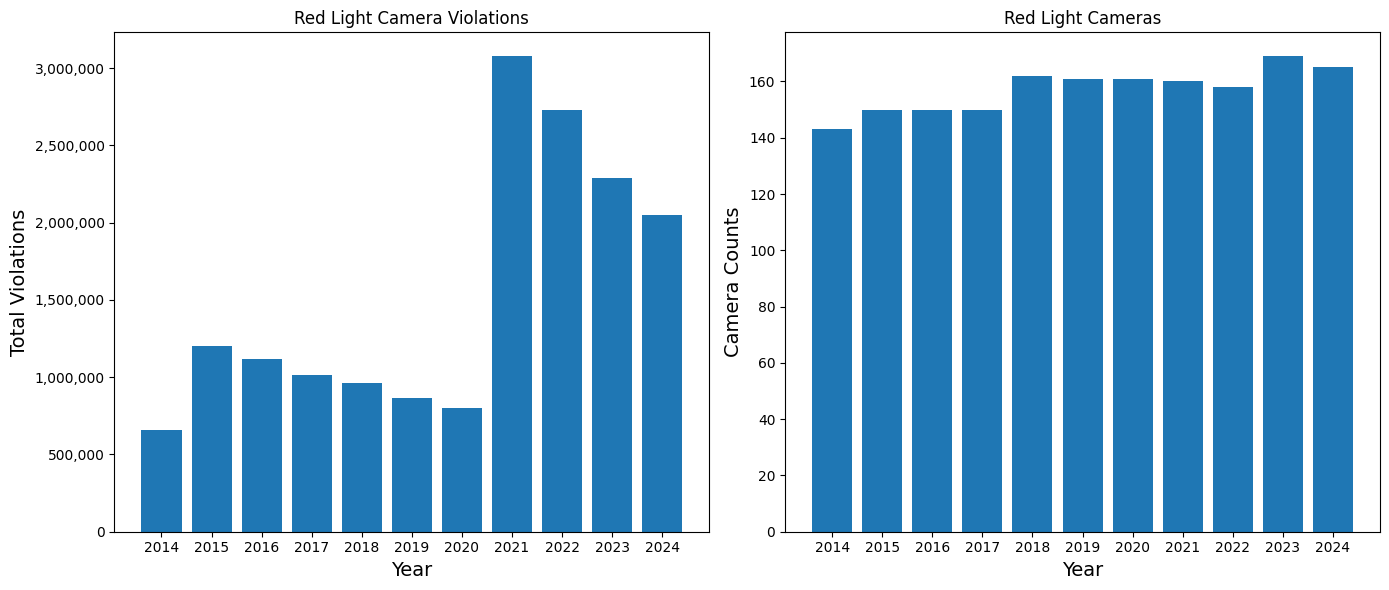

In [3]:

# side by side bars of camera violations to camera counts over years
plot_annual_camera_violations(df)

# Possible Analysis:
# increase of traffic post pandemic 


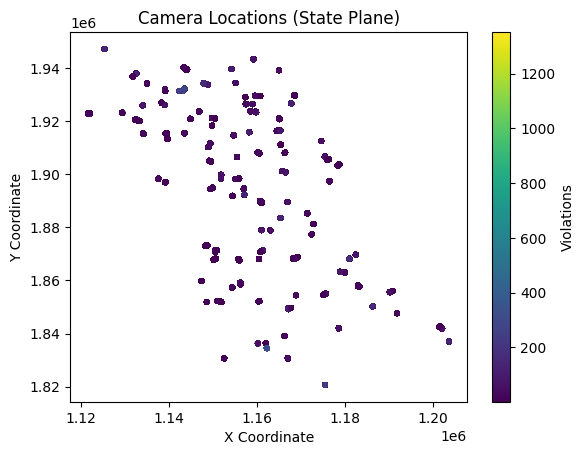

In [7]:
plt.scatter(df['X COORDINATE'], df['Y COORDINATE'], c=df['VIOLATIONS'], cmap='viridis', s=10)
plt.colorbar(label='Violations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Camera Locations (State Plane)')
plt.show()


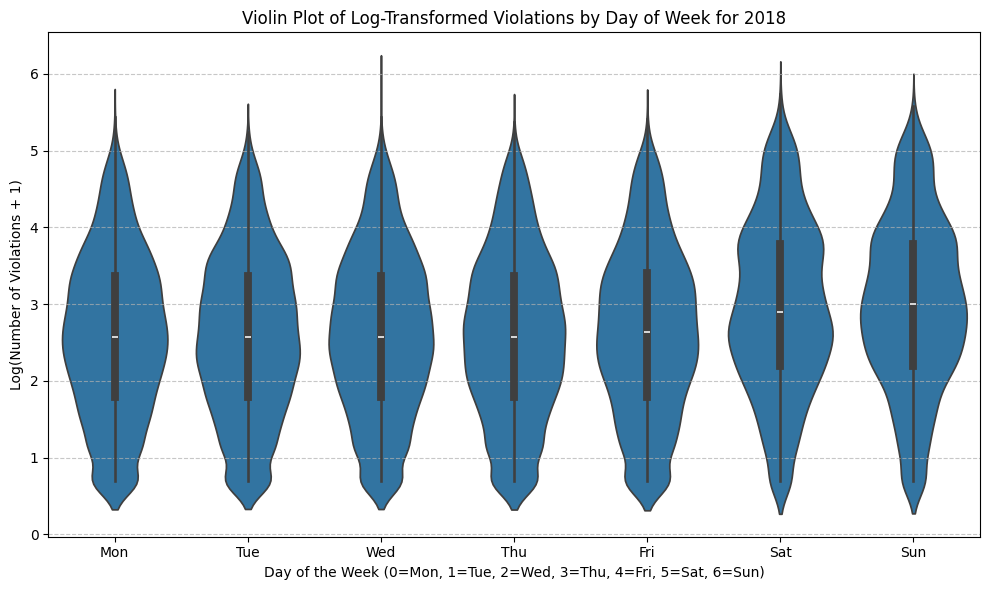

In [10]:
def create_day_of_week_violation_violin_plot_log_transformed(df, year=2024,violation_date_col='VIOLATION DATE', violations_col='VIOLATIONS'):
    """
    Generates a violin plot of the log-transformed number of violations by day of the week.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        violation_date_col (str, optional): The name of the column containing the violation date. Defaults to 'VIOLATION DATE'.
        violations_col (str, optional): The name of the column containing violation counts. Defaults to 'VIOLATIONS'.

    Returns:
        None: Displays the violin plot with log-transformed y-axis.
    """

    # Convert the violation date column to datetime objects
    df[violation_date_col] = pd.to_datetime(df[violation_date_col])

    # Extract the day of the week (Monday=0, Sunday=6)
    df['DAY_OF_WEEK'] = df[violation_date_col].dt.dayofweek

    # Apply a log transformation to the 'VIOLATIONS' column
    # Using np.log1p to handle potential zero values (log(1+x))
    df['LOG_VIOLATIONS'] = np.log1p(df[violations_col])

    df_yearfiltered = df.loc[(df['YEAR'] == year)]

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Create the violin plot with the log-transformed data
    sns.violinplot(x='DAY_OF_WEEK', y='LOG_VIOLATIONS', data=df_yearfiltered)

    # Set the labels for the axes
    plt.xlabel("Day of the Week (0=Mon, 1=Tue, 2=Wed, 3=Thu, 4=Fri, 5=Sat, 6=Sun)")
    plt.ylabel("Log(Number of Violations + 1)")
    plt.title(f"Violin Plot of Log-Transformed Violations by Day of Week for {year}")
    plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Label x-axis with day names
    plt.grid(True, which="major", axis="y", linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


years = sorted(list(df['YEAR']))

widgets.Dropdown(
    options=years,
    value=years[0],
    description='Violation year:',
    disabled=False,
)

create_day_of_week_violation_violin_plot_log_transformed(df,year=2018)


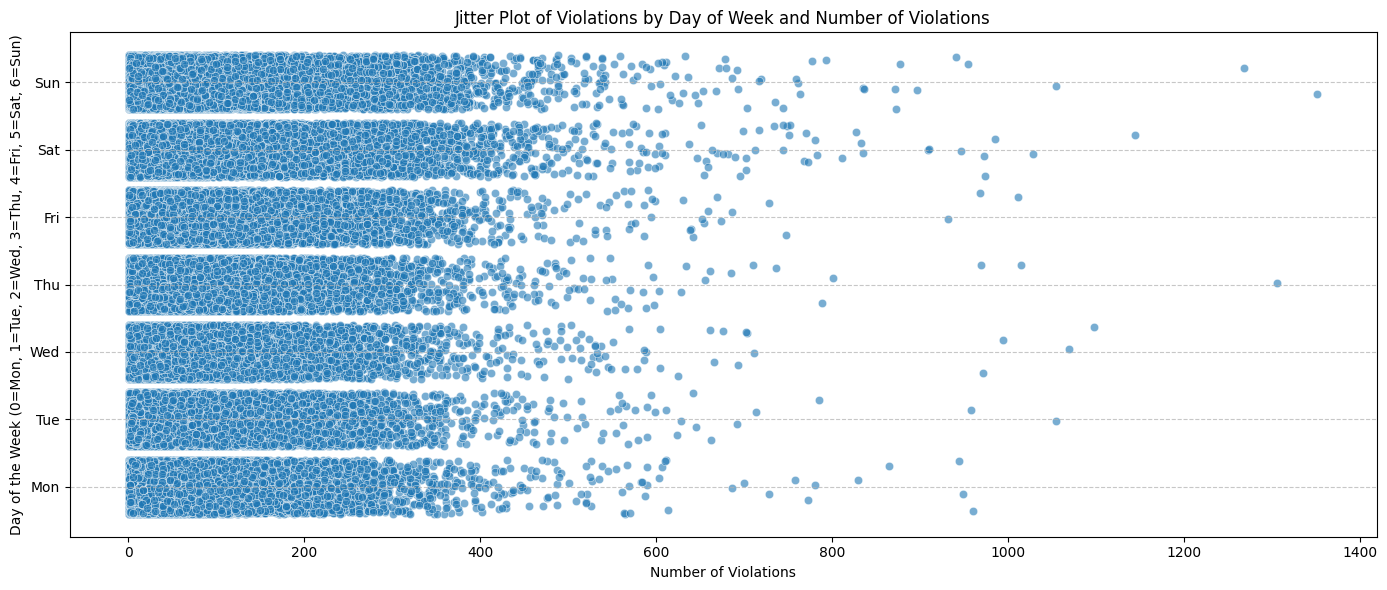

In [8]:
def create_day_of_week_violation_jitter_plot(df, violation_date_col='VIOLATION DATE', violations_col='VIOLATIONS'):
    """
    Generates a jitter plot based on the day of the week (number) against the number of violations.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        violation_date_col (str, optional): The name of the column containing the violation date. Defaults to 'VIOLATION DATE'.
        violations_col (str, optional): The name of the column containing violation counts. Defaults to 'VIOLATIONS'.

    Returns:
        None: Displays the jitter plot.
    """

    # Convert the violation date column to datetime objects
    df[violation_date_col] = pd.to_datetime(df[violation_date_col])

    # Extract the day of the week (Monday=0, Sunday=6)
    df['DAY_OF_WEEK'] = df[violation_date_col].dt.dayofweek

    plt.figure(figsize=(14, 6))  # Adjust figure size as needed

    # Create the jitter plot using scatterplot
    # We'll add a small random offset to the y-axis (day of week) to create jitter
    jitter = 0.4  # Adjust this value to control the amount of jitter
    sns.scatterplot(x=violations_col, y=df['DAY_OF_WEEK'] + np.random.uniform(-jitter, jitter, size=len(df)), data=df, alpha=0.6)

    # Set the labels for the axes
    plt.xlabel("Number of Violations")
    plt.ylabel("Day of the Week (0=Mon, 1=Tue, 2=Wed, 3=Thu, 4=Fri, 5=Sat, 6=Sun)")
    plt.yticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Label y-axis with day names
    plt.title("Jitter Plot of Violations by Day of Week and Number of Violations")
    plt.grid(True, which="major", axis="y", linestyle='--', alpha=0.7) # Add a horizontal grid for days
    plt.tight_layout()
    plt.show()


create_day_of_week_violation_jitter_plot(df)

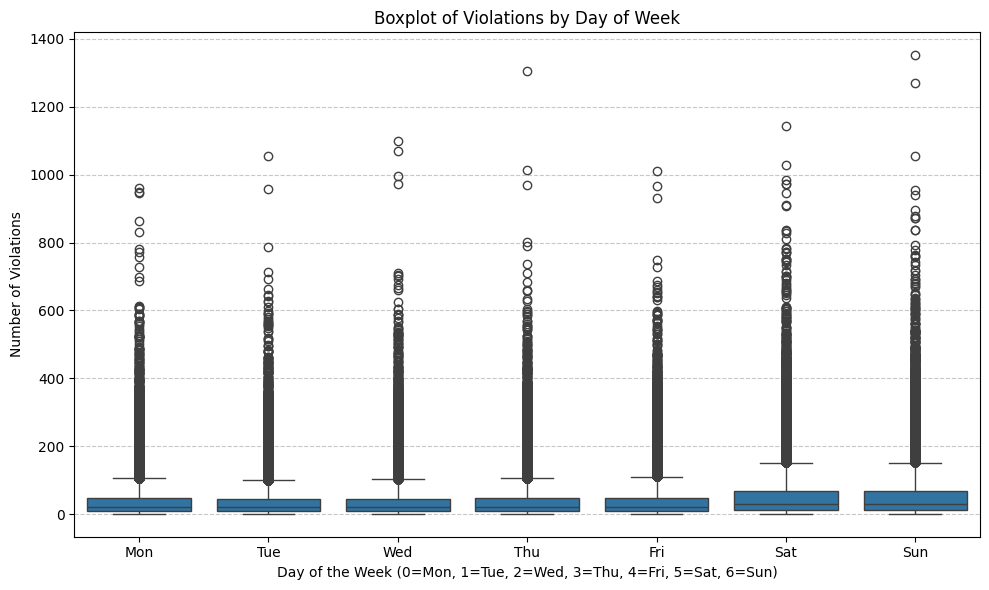

In [9]:
def create_day_of_week_violation_boxplot(df, violation_date_col='VIOLATION DATE', violations_col='VIOLATIONS'):
    """
    Generates a boxplot of the number of violations by day of the week.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        violation_date_col (str, optional): The name of the column containing the violation date. Defaults to 'VIOLATION DATE'.
        violations_col (str, optional): The name of the column containing violation counts. Defaults to 'VIOLATIONS'.

    Returns:
        None: Displays the boxplot.
    """

    # Convert the violation date column to datetime objects
    df[violation_date_col] = pd.to_datetime(df[violation_date_col])

    # Extract the day of the week (Monday=0, Sunday=6)
    df['DAY_OF_WEEK'] = df[violation_date_col].dt.dayofweek

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Create the boxplot
    sns.boxplot(x='DAY_OF_WEEK', y=violations_col, data=df)

    # Set the labels for the axes
    plt.xlabel("Day of the Week (0=Mon, 1=Tue, 2=Wed, 3=Thu, 4=Fri, 5=Sat, 6=Sun)")
    plt.ylabel("Number of Violations")
    plt.title("Boxplot of Violations by Day of Week")
    plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Label x-axis with day names
    plt.grid(True, which="major", axis="y", linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

create_day_of_week_violation_boxplot(df)

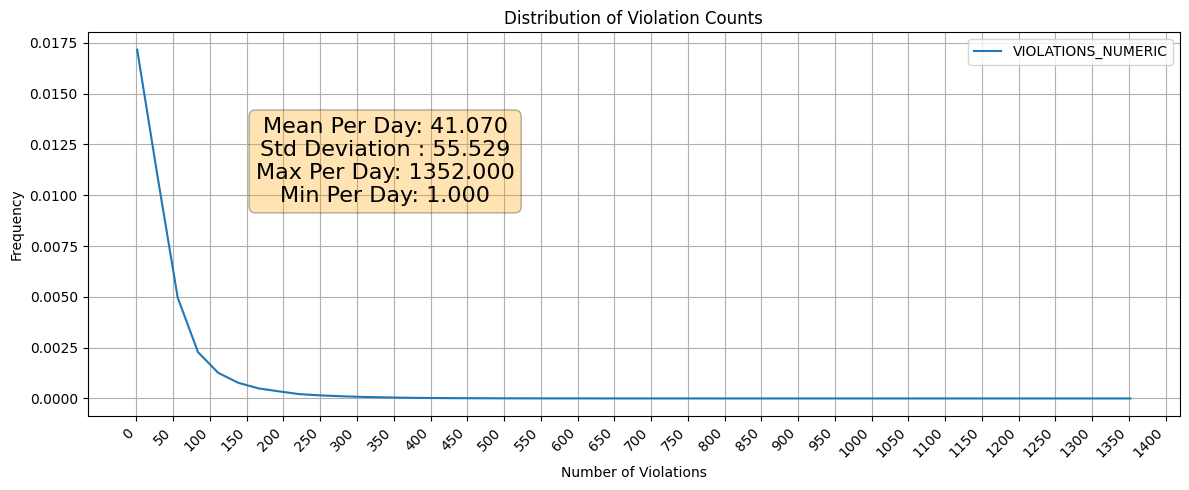

In [10]:
from scipy.stats import gaussian_kde

def create_violation_histogram(df):
    """
    Generates a histogram to visualize the distribution of violation counts.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        violations_col (str, optional): The name of the column containing violation counts. Defaults to 'VIOLATIONS'.

    Returns:
        None: Displays the histogram.
    """
    violations_col='VIOLATIONS_NUMERIC'
    min_val = df[violations_col].min()
    max_val = df[violations_col].max()

    

    
    plt.figure(figsize=(12, 5))  # Adjust figure size as needed

    # Create the histogram
    xgrpvalues = np.linspace(start=min_val, stop=max_val)
    kde = gaussian_kde(df[violations_col], bw_method='silverman')
    ykdevalues = kde(xgrpvalues)
    kdeplot= plt.plot(xgrpvalues, ykdevalues, label=violations_col)
    
    # Get the range of violation values
    min_violations = df[violations_col].min()
    max_violations = df[violations_col].max()

    # Determine the start and end points for the ticks with increments of 20
    start_tick = (min_violations // 50) * 50
    end_tick = ((max_violations + 49) // 50) * 50  # Ensure the last tick is at or above the max

    # Create a list of tick values with increments of 50
    tick_values = np.arange(start_tick, end_tick + 1, 50)

    txtdata = []
    txtdata.append(f"Mean Per Day: {df[violations_col].mean():.3f}")
    txtdata.append(f"Std Deviation : {df[violations_col].std():.3f}")
    txtdata.append(f"Max Per Day: {df[violations_col].max():.3f}")
    txtdata.append(f"Min Per Day: {df[violations_col].min():.3f}")


    props = dict(boxstyle='round', facecolor='orange', alpha=0.3)
    textstr = '\n'.join(txtdata)
    # 0.2 -> 0.1 = pulling along the x to the left
    # 0.01->0.00 = pulling it down along the y

    # use that GCA!
    ax = plt.gca()
    ax_xmin, ax_xmax = ax.get_xlim()
    ax_ymin, ax_ymax = ax.get_ylim()
    text_x = (ax_xmin + ax_xmax) / 2
    text_y = ax_ymax * 1.05  # Position slightly above the top
    plt.text(text_x/2, text_y/2, textstr, ha='center', va='bottom',fontsize=16, bbox=props)


    #plt.text(0.2, 0.05, textstr, ha="center", fontsize=10, bbox=props)


    # Explicitly set x-axis ticks with values
    plt.xticks(tick_values, rotation=45, ha='right')
    plt.title("Distribution of Violation Counts")
    plt.xlabel("Number of Violations")
    plt.ylabel("Frequency")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

create_violation_histogram(df)

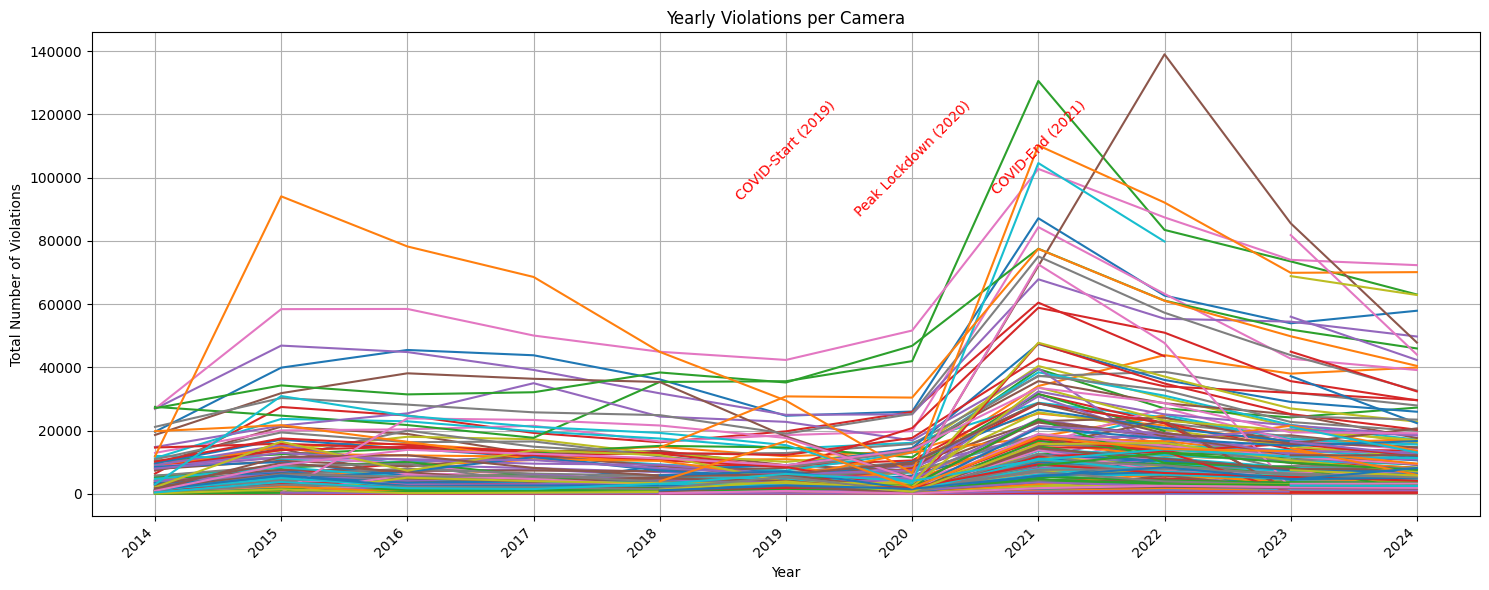

In [11]:
def create_camera_violation_yearly_line_plot(df, violation_date_col='VIOLATION_DATE', camera_id_col='CAMERA_ID', violations_col='VIOLATIONS_NUMERIC'):
    """
    Generates a line plot for each camera showing the total number of violations per year.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        violation_date_col (str, optional): The name of the column containing the violation date. Defaults to 'VIOLATION DATE'.
        camera_id_col (str, optional): The name of the column containing the camera ID. Defaults to 'CAMERA ID'.
        violations_col (str, optional): The name of the column containing violation counts. Defaults to 'VIOLATIONS'.

    Returns:
        None: Displays the line plot.
    """

    # Convert the violation date column to datetime objects
    df[violation_date_col] = pd.to_datetime(df[violation_date_col])

    # Extract the year from the violation date
    df['YEAR'] = df[violation_date_col].dt.year

    # Aggregate violations by camera and year
    yearly_violations = df.groupby([camera_id_col, 'YEAR'])[violations_col].sum().reset_index()

    # Get unique camera IDs
    camera_ids = yearly_violations[camera_id_col].unique()

    plt.figure(figsize=(15, 6))  # Adjust figure size as needed

    # Plot the data for each camera
    for camera_id in camera_ids:
        camera_data = yearly_violations[yearly_violations[camera_id_col] == camera_id]
        plt.plot(camera_data['YEAR'], camera_data[violations_col], label=camera_id)

    # Add text for 2019 and 2020 - THE Pandemic
    years_to_annotate = [2019, 2020, 2021]
    max_violation = yearly_violations[violations_col].max() # Get a general max for y-positioning


    all_years = sorted(yearly_violations['YEAR'].unique())
    plt.xticks(all_years, rotation=45, ha='right')

    year_labels ={}
    year_labels[2019] = 'COVID-Start (2019)'
    year_labels[2020] = 'Peak Lockdown (2020)'
    year_labels[2021] = 'COVID-End (2021)'
    
    for year in years_to_annotate:
        if year in yearly_violations['YEAR'].values:
            plt.text(year, max_violation * 0.9, year_labels[year], rotation=45, ha='center', va='top', fontsize=10, color='red')

    plt.xlabel("Year")
    plt.ylabel("Total Number of Violations")
    plt.title("Yearly Violations per Camera")
    #plt.legend(title="Camera ID")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

create_camera_violation_yearly_line_plot(df)

## Line Chart

### Overview



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'Category': ['A', 'B', 'C', 'D'],
        'Value': [10, 25, 15, 30],
        'ExtraValue': [100,200,300,400]}

df = pd.DataFrame(data)

plt.bar(df['Category'], df['Value'])

for i, value in enumerate(df['Value']):
    plt.text(i, value + 1, str(df['ExtraValue'][i]), ha='center') # Add ExtraValue as text

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Extra Value Annotations')
plt.show()

In [ ]:
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

df = df_copy.copy()


# setup filters
all_cameras = sorted(df['CAMERA_ID'].unique().tolist())
w=widgets.Dropdown(
    options=all_cameras,
    value=all_cameras[0],
    description='Camera',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change,names='value')

display(w)





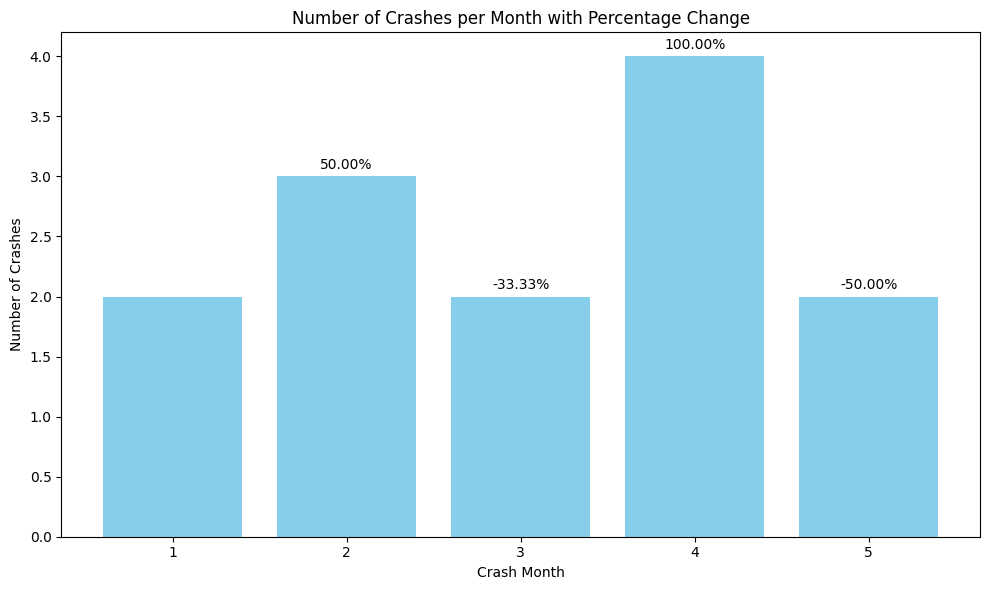

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_monthly_crash_change(df):
    """
    Generates a bar plot of crash counts per month with percentage change annotations.

    Args:
        df (pd.DataFrame): DataFrame containing crash data with a 'CRASH_MONTH' column.
    """
    if 'CRASH_MONTH' not in df.columns:
        print("Error: DataFrame must contain a 'CRASH_MONTH' column.")
        return

    # Aggregate by CRASH_MONTH and count the number of crashes
    monthly_counts = df['CRASH_MONTH'].value_counts().sort_index()

    # Prepare data for plotting
    months = monthly_counts.index.tolist()
    counts = monthly_counts.values.tolist()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(months, counts, color='skyblue')
    plt.xlabel('Crash Month')
    plt.ylabel('Number of Crashes')
    plt.title('Number of Crashes per Month with Percentage Change')
    plt.xticks(months)  # Ensure all months are displayed

    # Annotate the percentage of change between the bars
    for i in range(1, len(counts)):
        old_count = counts[i-1]
        new_count = counts[i]
        if old_count == 0:
            percentage_change = float('inf') if new_count > 0 else 0
        else:
            percentage_change = ((new_count - old_count) / old_count) * 100

        height = bars[i].get_height()
        plt.annotate(f'{percentage_change:.2f}%',
                     xy=(bars[i].get_x() + bars[i].get_width() / 2, height),
                     xytext=(0, 3),  # Offset in points
                     textcoords='offset points',
                     ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

data = {'CRASH_MONTH': [1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5]}
crash_data = pd.DataFrame(data)

plot_monthly_crash_change(crash_data)


In [ ]:




# Example of plotting by hour of the Day.

df['MONTH'] = pd.to_datetime(df['VIOLATION DATE']).dt.month
month_of_year_violations = df.groupby('MONTH')['VIOLATIONS'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(month_of_year_violations['MONTH'], month_of_year_violations['VIOLATIONS'], marker = 'o', linestyle = '-')
plt.title("Month in Year Violations")
plt.xlabel("Month in the Year")
plt.ylabel("Number of Violations")
#plt.grid()
# don't show this messy
plt.xticks(range(12)) #Make sure all months are shown.
plt.tight_layout()
plt.show()



## Heat Map

## Box Plot

## As part of this Analysis we have been guided be the following rules:

- Rule 1: Story Telling
    - As it has presented here, the notebook lays out the background on the data. What it was being used for and how the underlining data can be analyzed.
- Rule: 2 Document the process
    - Each part of the source data, source code and how the two were used in combination to produce the living and reusable workbook.
- Rule 3: Use of cell division to make things clear
    - Per cell, context to what code is being run and what it is functions it is performing. Where possible code examples are provided for context and adhere to a 3R model of Repeatable, Reliable and Reusable.
- Rule 4: Modularity of code
    - As part of this workbook and the necessary code, helper functions the encapsulate larger complex code have been created and provided so the workbook is readable and clear.